# Les facteurs géographiques du Covid : corrélation et causalité : Analyse des corrélations entre indicateurs sociaux départementaux et viralité/mortalité du Covid par département

## Présentation générale du projet

### Problématique et contexte

Le Covid-19 a été un évènement marquant du siècle, impactant au niveau mondial la vie de tous les êtres humains. La pandémie, et ses conséquences (comme les politiques de confinement) ont eu un impact fort sur l'économie et sur la vie quotidienne des habitants dans tous les pays. Plus grave encore, c'est le bilan humain du Covid qui est marquant, avec presque 7 millions d'individus décédés dûs au Covid-19 à travers le monde.

Dans le cadre de ce projet Python pour la Data Science, nous réalisons une étude de cas sur le territoire français métropolitain. Nous cherchons à étudier et à analyser l'impact du Covid en fonction du département, et en particulier en fonction de certains indicateurs sociaux des départements.
Cette étude part d'une hypothèse simple : les départements avec le plus de pauvreté ou le plus haut taux de vieillesse devraient être les plus impactés.


### Données

Pour réaliser ce projet, nous utilisons exclusivement des données publiques fournies par des services ministérielles : d'une part, les données mises à disposition sur data.gouv.fr relatives au Covid, d'autre part, les données mises à disposition par la DREES (Direction de la Recherche, des Études, de l'Évaluation et des Statistiques). En particulier, nous avons fait appel aux bases de donnéees suivantes :

* Pour data.gouv, les données relatives aux hospitalisations durant le Covid, aux passages aux urgences, aux nombres de dépistages; et au registre des établissements de santé géolocalisées.
* Pour les données de la DREES, les données relatives à l'espérance de vie, à la disparité des niveaux de vie, à l'intensité de la pauvreté monétaire, à l'indice de vieillissement et à la population selon âge.

Le découpage géographique choisi pour cette étude est, comme précisé plus haut, les départements, échelle la plus précise où l'on dispose du maximum d'informations pertinentes.
Malheureusement, nous n'avons pas pu inclure dans notre étude les départements et territoires d'Outre-mer au vu de l'hétérogénéïté des données disponibles les concernant.

### Structure du projet

Nous avons choisi pour réaliser ce projet une structure modulaire assez classique afin de distinguer dans le code différentes étapes :
- la liste des données utilisées, via leur url de téléchargement (donnees.txt)
- l'import des données (fileopener.py)
- le nettoyage des données (datapreprocessing.py)
- l'analyse des données via des statistiques descriptives (stats.ipynb)
- des essais de modélisations statistiques (model.py)
- ce fichier principal présentant les résultats du projet (main.py)

### Reproductibilité du projet

Afin d'assurer une reproductibilité partielle du projet, le dataframe final des données, créé suite à l'importation et au nettoyage des données, et utilisé pour l'analyse et la modélisation statistique, est enregistré sous format csv au sein de ce projet. Nous portons à votre attention que les données utilisées étant des données ministérielles, il y a de fortes chances qu'elles restent disponibles, d'autant plus que les données du Covid sont à priori (on l'espère) des archives non-destinées à être modifiées.

Pour ce qui est de la reproductibilité au niveau programmation, comme il est d'usage, ce projet contient un fichier textuel requirements.txt contenant la liste de tous les packages nécessaires. L'exécution dans le terminal de la commande `pip install -r requirements.txt` suffira à vérifier qu'ils sont bien tous installés sur votre machine. Cette étape est donc nécessaire pour pouvoir naviguer dans la suite du projet et tout particulièrement exécuter la cellule suivante.

## Import des différentes parties du code

In [9]:
from fileopener import *
from datapreprocessing import *
from model import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

## Nettoyage des données

Nous disposons de 9 bases de données distinctes, importées en dataframe pandas : df_hosp, df_urgences, df_depistage, df_etab, df_espvie, df_nvvie, df_pauv, df_vieil et df_pop.
Les bases de données étaient assez différentes, bien que l'importation des données a été réalisée de manière relativement uniforme, le nettoyage a dû être propre à chaque dataframe. Pour ce qui est des valeurs manquantes, le choix a été fait de les mettre à 0 pour des variables compteurs (comme le nombre de passages aux urgences dûes au Covid en partant du principe que la cellule a probablement été laissée vide car il n'y avait pas de passage aux urgences), pour des indicateurs comme l'espérance de vie, on a choisi de mettre les valeurs manquantes à la médiane, afin de de ne pas trop changé la répartition de l'échantillon.

Nous avons ensuite regroupé toutes les variables pertinentes dans un unique dataframe df_final indexé par départements. En voici un aperçu :

In [10]:
df_final.head()

,nom_dep,Moins de 20 ans,Moins de 25 ans,25 à 64 ans,65 ans ou plus,75 ans ou plus,80 ans ou plus,85 ans ou plus,pop_totale,Moins de 20 ans.1,Moins de 25 ans.1,25 à 64 ans.1,65 ans ou plus.1,75 ans ou plus.1,80 ans ou plus.1,85 ans ou plus.1,nb hospitalisations,nb deces,espérance de vie,passage_urg_corona,nb_etab_sante,esp_de_vie_H_60,esp_de_vie_F_60,esp_de_vie_H_65,esp_de_vie_F_65,rapport nv_vie interdécile D9/D1,indicateur pauvreté 1,indicateur pauvreté 2,patients positifs,patients testés,ratio patients positifs/population,ratio patients positifs/testés,ratio patients testés/population,ratio population/etab
num_dep,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,Ain,171336.0,203449.0,344459.0,131590.0,61926.0,35163.0,18688.0,679498.0,25.215085,29.941074,50.693159,19.365767,9.113493,5.174850,2.750266,5924,874,71.9,3176.0,214,24.4,27.9,20.3,23.4,3.5,20.4,18.2,392838.0,2601627.0,57.812974,15.099705,382.874858,3175.224299
02,Aisne,125708.0,152860.0,251931.0,116841.0,53128.0,29580.0,16774.0,521632.0,24.098982,29.304184,48.296692,22.399124,10.184958,5.670664,3.215677,10705,1647,86.0,4350.0,230,21.9,26.3,18.2,21.9,3.1,20.1,20.3,272177.0,1932208.0,52.177972,14.086320,370.415925,2267.965217
03,Allier,66246.0,81986.0,152745.0,97977.0,49747.0,29925.0,17424.0,332708.0,19.911153,24.642028,45.909626,29.448345,14.952150,8.994373,5.237025,7585,977,139.2,2568.0,164,23.1,27.2,19.4,23.0,3.0,20.1,21.0,174112.0,1273660.0,52.331774,13.670210,382.816163,2028.707317
04,Alpes-de-Haute-Provence,33920.0,40903.0,80162.0,47096.0,23412.0,13630.0,7259.0,168161.0,20.171146,24.323714,47.669793,28.006494,13.922372,8.105328,4.316696,3484,399,128.9,1780.0,98,24.1,27.7,20.0,23.3,3.2,20.5,19.9,99411.0,807426.0,59.116561,12.312088,480.150570,1715.928571
05,Hautes-Alpes,27874.0,33506.0,68377.0,39778.0,19651.0,11323.0,6406.0,141661.0,19.676552,23.652240,48.268048,28.079711,13.871849,7.993026,4.522063,3710,412,124.9,1676.0,87,24.4,28.6,20.4,24.2,3.0,19.9,19.6,82765.0,593457.0,58.424690,13.946251,418.927581,1628.287356


## Analyse statistique des données

In [11]:
df_visu = df_final.copy() 

### Une grande disparité de caractéristiques entre les départements de France métropolitaine

On sait que la covid a frappé de manière hétérogène les individus, on parlait durant la crise sanitaire de "facteur aggravant". On peut citer par exemple l'âge, ou la condition physique. On sait par ailleurs que les différents départements ne sont pas homogènes dans la structure de leur population, par exemple, si on regarde la proportion d'habitants ayant un âge supérieur ou égale à 65 ans, on observe déjà de fortes disparités.

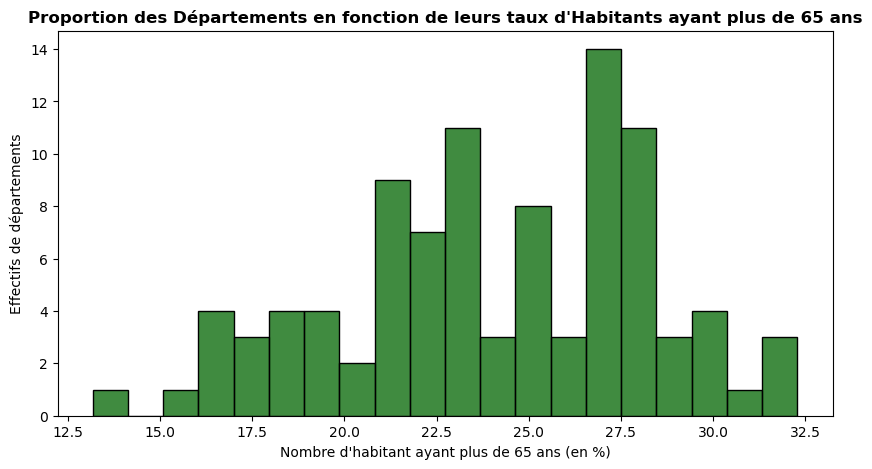

In [12]:
plus_de_65 = df_visu["65 ans ou plus.1"]
plt.figure(figsize=(10,5))
ax = sns.histplot(plus_de_65, bins=20, kde=None, color="darkgreen")
plt.title("Proportion des Départements en fonction de leurs taux d'Habitants ayant plus de 65 ans", fontweight="bold")
plt.xlabel("Nombre d\'habitant ayant plus de 65 ans (en %)")
plt.ylabel("Effectifs de départements")

plt.show()

Comme le montre ce modeste graphique, observe une grande disparité d'âge entre les différents départements français. Il sera donc intéressant d'identifier les différents facteurs de mortalités de la Covid. En effet, grâce à ces disparités, les départements sont des grands échantillons qui nous semblent donc intéressant d'analyser pour en tirer des conclusions sur les facteurs de mortalités de la Covid. 

### Vue d'ensemble sur la mortalité due à la Covid

Pour commencer, il est primordial d'identifier les départements enregistrant le plus grand nombre de décès. Afin de donner du sens à ce diagramme en barres, il est nécessaire de pondérer le nombre de décès par la population totale de chaque département. En effet, si Paris, avec ses 2 millions d'habitants, enregistre 1000 décès, alors que la Lozère, avec seulement 76 000 habitants, enregistre 750 décès, il serait incorrect de conclure que la Covid-19 sévit davantage à Paris qu'en Lozère sans cette pondération.

La pondération des décès par la population totale permet une comparaison équitable entre départements de tailles démographiques différentes. Cette approche révèle que, proportionnellement, la mortalité liée à la Covid-19 peut varier indépendamment du nombre absolu de décès. Par exemple, un taux de mortalité élevé dans un département peu peuplé pourrait indiquer une vulnérabilité particulière, tandis qu'un taux plus bas dans un département très peuplé pourrait masquer des défis logistiques ou sanitaires spécifiques.

De plus, cette méthode met en lumière l'importance des facteurs démographiques dans l'analyse des données de santé publique. En pondérant les décès, on évite des conclusions erronées basées uniquement sur le nombre absolu de décès, permettant ainsi une meilleure compréhension des dynamiques de mortalité liées à la Covid-19 au sein des différents départements.


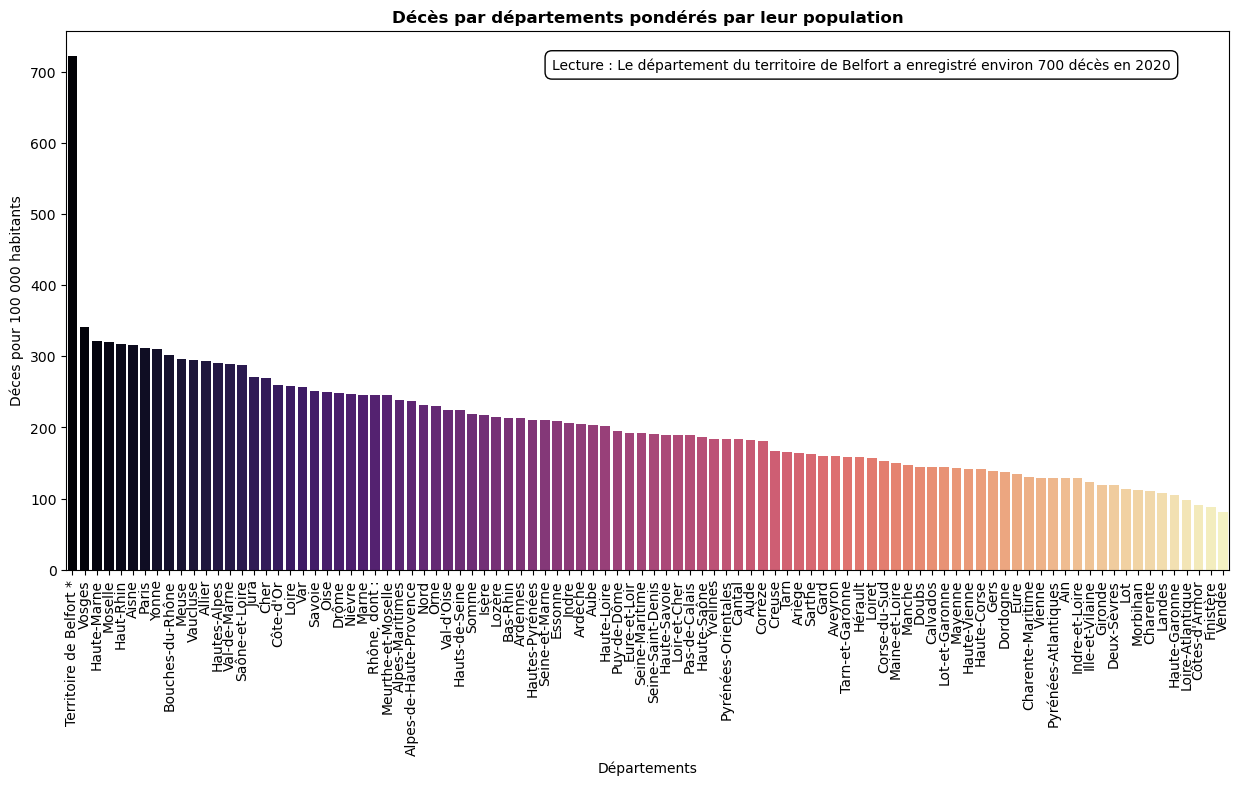

In [13]:
""" Nombre de décès par rapport à la population totale"""

df_visu["deces_pond"] = df_visu["nb deces"]/df_visu["pop_totale"]*100_000
sort_dies = df_visu.sort_values(by="deces_pond", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
ax=sns.barplot(x="nom_dep", y="deces_pond", data=sort_dies, palette="magma")
plt.xticks(rotation=90)
plt.title("Décès par départements pondérés par leur population", fontweight='bold')
plt.xlabel("Départements")
plt.ylabel("Déces pour 100 000 habitants")
# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : Le département du territoire de Belfort a enregistré environ 700 décès en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.show()



On remarque, à l'aide du diagramme en barre ci-dessus, que la répartition des décès liés à la Covid-19 n'est pas homogène à travers l'ensemble des départements français. En effet, des extrêmes marqués se manifestent, illustrant des variations significatives dans les taux de mortalité.

Premièrement, le département du **Territoire de Belfort** présente un taux exceptionnel de **700 décès pour 10 000 habitants**, une valeur particulièrement critique compte tenu de son ampleur. En contraste, la **Vendée** enregistre seulement une centaine de décès pour la même population. Cette disparité initiale suggère une incidence de mortalité extrêmement variable entre les départements.

Deuxièmement, même en excluant l'anomalie observée à Belfort, le département des **Vosges** affiche un taux de mortalité deux fois supérieur à celui de la Vendée. Cet écart, bien que moins extrême que celui observé à Belfort, demeure considérable et ne peut être ignoré dans l'analyse des données de mortalité liées à la Covid-19.

Par ailleurs, pour compléter cette représentation visuelle de la létalité de la Covid-19 en France durant la crise sanitaire, il est également pertinent de représenter, par un diagramme en barres, les chances de survie suite à une hospitalisation due à une infection par la Covid-19, par département.


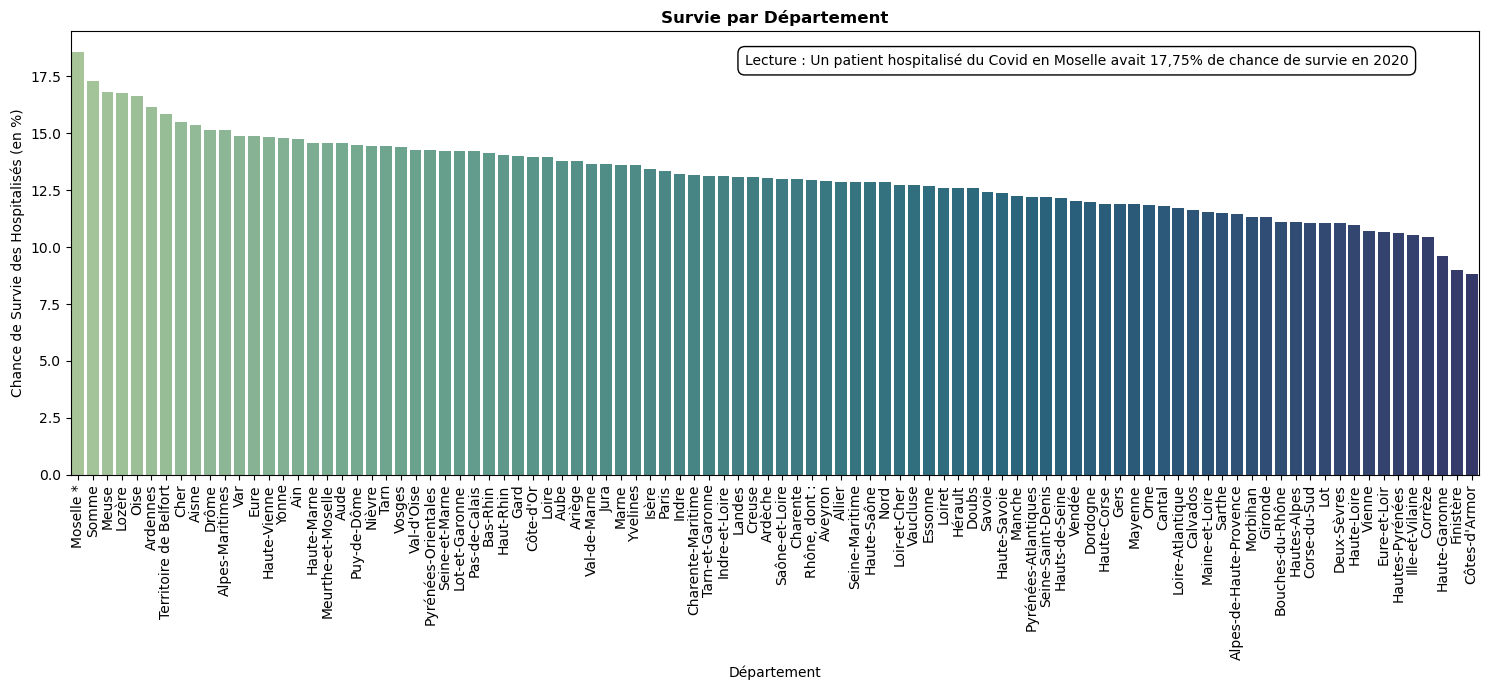

In [14]:
""" Représentons par un barplot les différentes chances de survie à une hospitalisation de la Covid selon le département d'hospitalisation"""
df_visu["chance_de_survie"] = ((df_visu["nb hospitalisations"]/df_visu["nb deces"])**-1)*100
sort_chance_de_survie = df_visu.sort_values(by = "chance_de_survie", ascending=False)

plt.figure(figsize=(15,7))
ax=sns.barplot(x="nom_dep", y="chance_de_survie", data=sort_chance_de_survie,palette = "crest")
plt.xticks(rotation=90)
plt.title("Survie par Département", fontweight='bold')
plt.xlabel("Département")
plt.ylabel("Chance de Survie des Hospitalisés (en %)")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : Un patient hospitalisé du Covid en Moselle avait 17,75% de chance de survie en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

On remarque à l'aide du graphique ci-dessus, une considérable différence de chance de survie entre la Moselle, enregistrant une chance de survie de 17,5% suite à une hospitalisation de patient atteint de la Covid contre à peine 10% pour la Côtes-d'Armor. Il est donc temps de réaliser d'autres graphiques pour essayer de visualiser et comprendre les différences entres les départements français pouvant expliquer ces caractéristiques particulières.

### Visualisons quels peuvent être les causes de cette mortalité

Pour commencer, il nous parait raisonnable de penser que ces différences de mortalités s'expliquent par le nombre d'établissement de santé susceptibles de dépister ou de soigner les infectés ou potentiels infectés de la Covid au sein de chaque départements. Nous allons donc représenter le nombre de ces établissements pour 100 000 habitants.

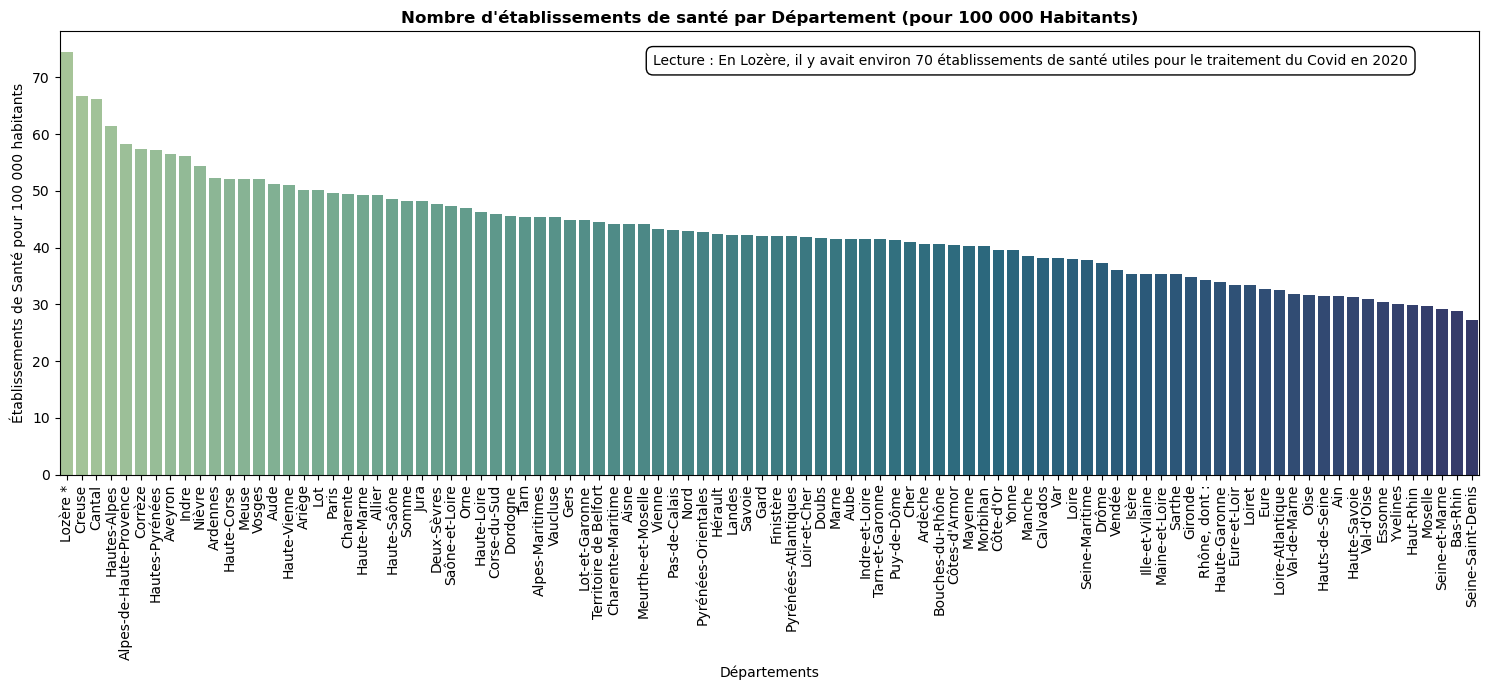

In [15]:
"""Classement des départements par rapport au nombre d'établissements de santé pour 100 000 habitants(utiles pour le soin de la Covid)"""
df_visu["etab_sante_ponderate"] = df_visu["nb_etab_sante"]/df_visu["pop_totale"]*100_000

sort_etablissement = df_visu.sort_values(by="etab_sante_ponderate", ascending=False)
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="etab_sante_ponderate", data=sort_etablissement, palette="crest")
plt.xticks(rotation=90)
plt.title("Nombre d\'établissements de santé par Département (pour 100 000 Habitants)", fontweight="bold")
plt.xlabel("Départements")
plt.ylabel("Établissements de Santé pour 100 000 habitants")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : En Lozère, il y avait environ 70 établissements de santé utiles pour le traitement du Covid en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

L'analyse représentée par ce diagramme en barres met en évidence que la Lozère est le département le mieux pourvu en établissements de soins en France, tandis que la Seine-Saint-Denis présente la dotation la plus faible. Cependant, ces résultats doivent être interprétés avec prudence et nuance.

La dotation élevée en établissements de soins dans la Lozère pourrait s'expliquer par des politiques locales de santé publique efficaces ou par une population relativement stable nécessitant un accès constant à des services de santé. En revanche, la faible dotation observée en Seine-Saint-Denis pourrait initialement suggérer une insuffisance des infrastructures de soins dans ce département. Toutefois, une analyse plus approfondie révèle que cette interprétation est probablement erronée.

La Seine-Saint-Denis, bien que classée comme le département le moins bien doté selon ce graphique, est en réalité située en périphérie de Paris, une des régions les plus densément peuplées et les mieux équipées en infrastructures de santé en France. Cette proximité avec un centre urbain majeur et ses zones densément servies en établissements de soins peuvent compenser, voire surpasser, la dotation apparente indiquée par les données brutes. Ainsi, il est peu probable que les résidents de la Seine-Saint-Denis soient véritablement désavantagés en matière de services de santé.

Le constat initial de cette analyse présente un biais potentiel lié à la distribution géographique des départements par rapport aux centres urbains. Les départements éloignés des zones densément équipées en services de soins, comme la Lozère, peuvent apparaître comme mieux dotés en raison de la concentration des établissements dans des régions moins peuplées mais géographiquement plus accessibles.

Pour corriger ce biais et obtenir une représentation plus fidèle de la répartition des établissements de soins, il serait pertinent d'intégrer des variables géographiques supplémentaires dans l'analyse, pour, par exemple mesurer la distance des départements par rapport aux grandes agglomérations équipées en infrastructures de santé, ou bien, prendre en compte la densité de population pour ajuster la dotation en établissements de soins en fonction des besoins réels, mais aussi évaluer l'accessibilité physique et logistique des établissements de soins pour les résidents des départements concernés.

Ainsi, bien que le diagramme en barres indique que la Lozère est le département le mieux doté en établissements de soins et la Seine-Saint-Denis le moins bien doté, ces résultats doivent être contextualisés géographiquement et démographiquement. La proximité des départements avec les centres urbains et la densité de population jouent un rôle crucial dans la répartition effective des services de santé.

En second lieu, il nous semble important de comparer les départements ayant le moins testé, pour voir si il y a une corrélation ou non.

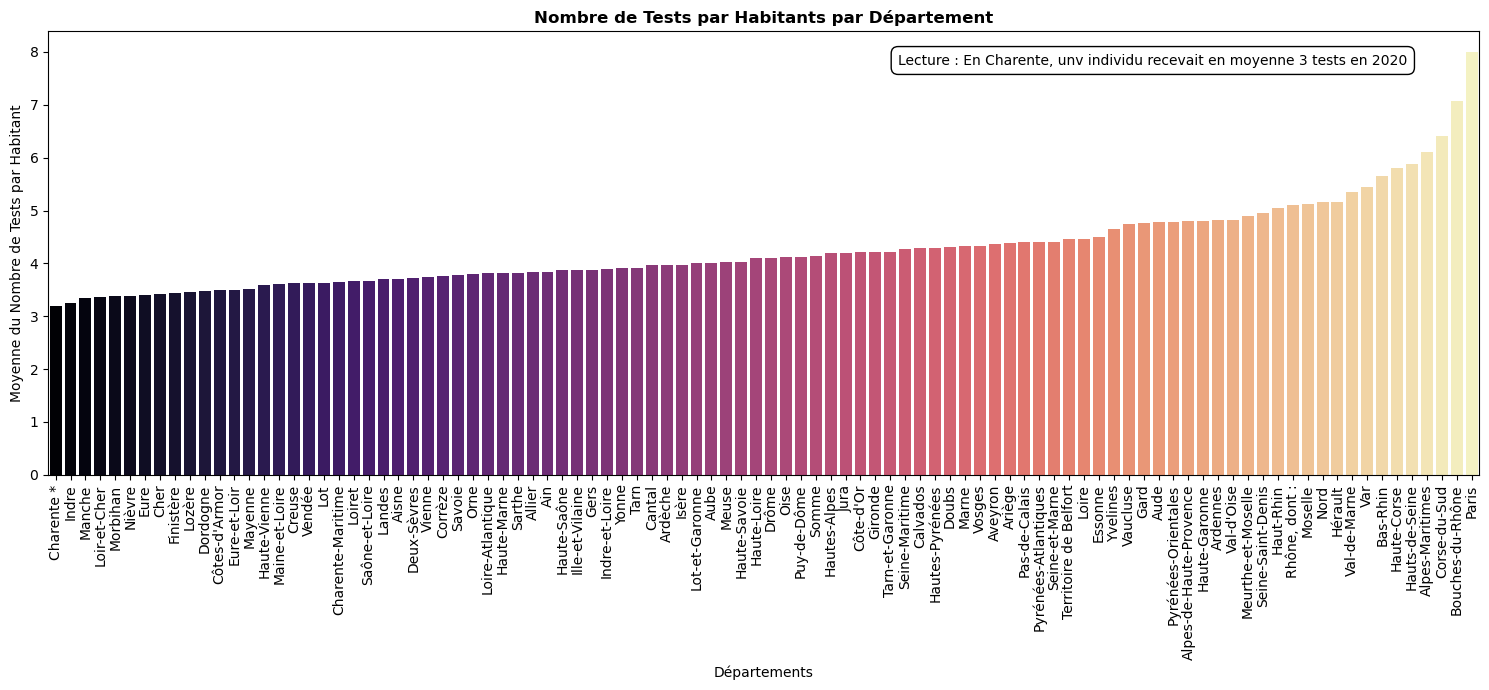

In [16]:
"""Regardons les départements qui testent le moins"""
df_visu["nb_test_par_hab"] = df_visu["ratio patients testés/population"]/100
sort_test = df_visu.sort_values(by="nb_test_par_hab", ascending=True)

#bar plot
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="nb_test_par_hab", data=sort_test, palette="magma")
plt.xticks(rotation=90)
plt.title("Nombre de Tests par Habitants par Département", fontweight="bold")
plt.xlabel("Départements")
plt.ylabel("Moyenne du Nombre de Tests par Habitant")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : En Charente, unv individu recevait en moyenne 3 tests en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

Paradoxalement, lorsqu'on ne tient pas compte des limites méthodologiques précédemment évoquées, il apparaît que la Seine-Saint-Denis affiche un taux de tests par habitant significativement supérieur à la moyenne nationale. En revanche, la Charente, département précédemment bien positionné dans l'analyse des barres, se retrouve reléguée en bas du classement actuel. Cette régression suggère des disparités marquées dans la répartition des ressources de dépistage entre les départements.

Le diagramme ci-dessus révèle que les départements à dominante rurale, tels que la Charente et l'Indre, figurent parmi les moins performants en termes de taux de dépistage. À l'inverse, les départements abritant de grandes agglomérations, comme Paris et le Val-de-Marne, présentent les taux de dépistage les plus élevés. Cette tendance pourrait s'expliquer par plusieurs facteurs. On peut par exemple penser que les zones urbaines disposent généralement de plus d'infrastructures médicales et de centres de dépistage, facilitant un accès plus large et rapide aux tests, ou encore qu'une densité de population élevée et une mobilité accrue dans les grandes villes peuvent accroître la demande et la capacité de dépistage, mais aussi que les campagnes de sensibilisation sont souvent plus intensives et mieux financées dans les régions densément peuplées.

Cependant, il est important de ne pas interpréter ces résultats de manière manichéenne, en attribuant systématiquement une supériorité aux départements urbains au détriment des zones rurales. En effet, certaines anomalies méritent une attention particulière. La Loire-Atlantique, qui inclut Nantes, ne présente pas un taux de dépistage aussi élevé que celui observé en Corse-du-Sud, malgré la présence d'une grande agglomération. Cette disparité pourrait être influencée par des facteurs tels que les politiques locales de santé publique, la réactivité des administrations départementales ou encore des événements spécifiques ayant mobilisé des ressources de dépistage dans certaines régions.

Cette représentation graphique, ne permet pas en revanche, d'expliquer de manière exhaustive les variations observées dans les taux de mortalité liés à la Covid-19. La Vendée, département affichant une faible mortalité, présente également un faible taux de dépistage. À l'inverse, le Territoire de Belfort, département en tête en termes de mortalité, affiche un taux de dépistage supérieur à la moyenne nationale. Ces observations suggèrent que le taux de dépistage seul ne suffit pas à expliquer les taux de mortalité, et que d'autres variables, telles que la qualité des soins, les facteurs socio-économiques ou les comportements individuels, jouent un rôle crucial.

Nous pouvons aussi explorer la piste des écarts de richesses entre départements pour expliquer les disparités de mortalités liées à la Covid.

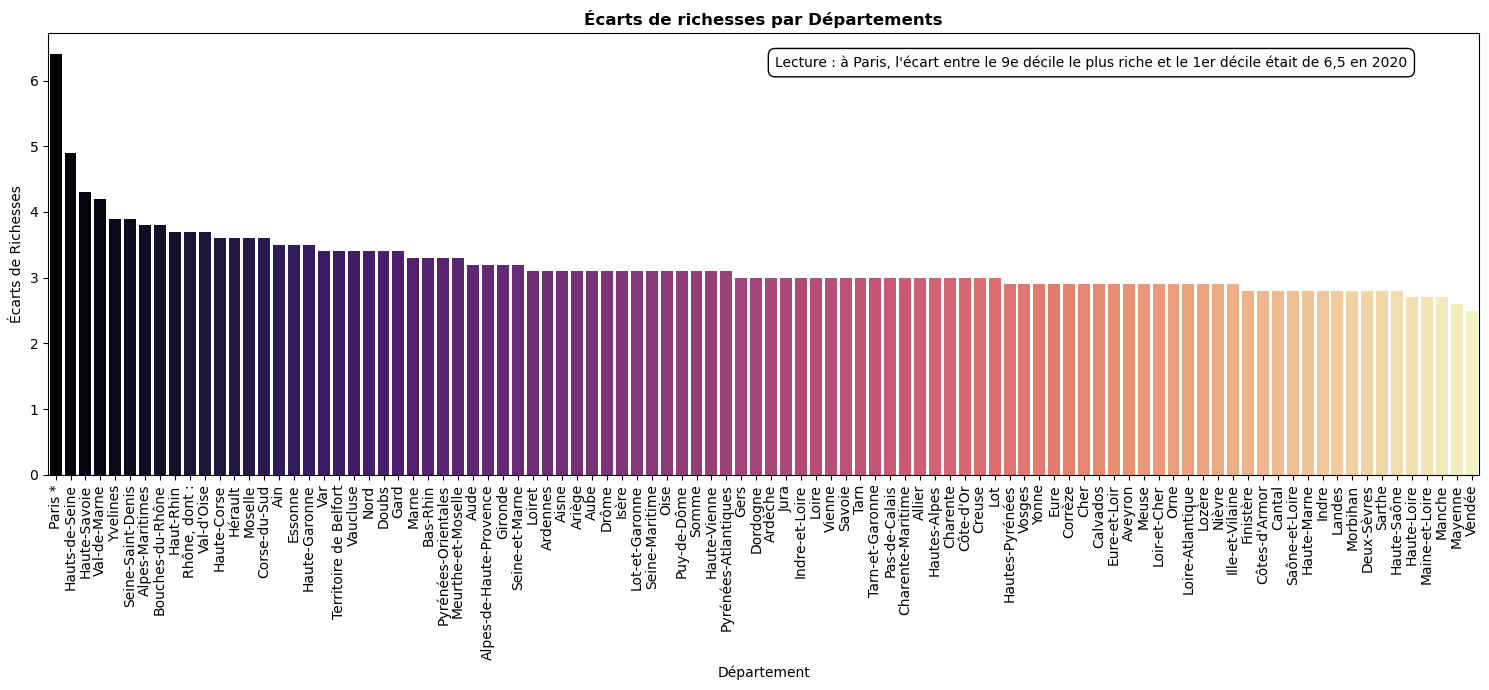

In [17]:
"""Classement des départements par rapport au niveau de vie (rapport interdécile)"""
sort_niveau_de_vie = df_visu.sort_values(by="rapport nv_vie interdécile D9/D1", ascending=False)
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="rapport nv_vie interdécile D9/D1", data=sort_niveau_de_vie, palette="magma")
plt.xticks(rotation=90)
plt.title("Écarts de richesses par Départements", fontweight="bold")
plt.xlabel("Département")
plt.ylabel("Écarts de Richesses")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : à Paris, l\'écart entre le 9e décile le plus riche et le 1er décile était de 6,5 en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()


Le diagramme en barres ci-dessus révèle des disparités économiques marquées entre les zones urbaines et rurales en France. Sans grande surprise, **Paris** affiche le plus grand écart de richesse, tandis que **La Vendée**, reconnu pour son dynamisme économique et son solide tissu de TPE-PME, présente le score le plus bas en termes d'écarts de richesse.

Cependant, il est important de noter que, mis à part Paris, les écarts de richesse entre les différents départements français restent raisonnables et relativement homogènes. Cette homogénéité suggère que, globalement, les disparités économiques ne sont pas extrêmes dans la majorité des départements, à l'exception notable de la capitale.

Cette analyse met en lumière que les écarts de richesse ne permettent pas d'expliquer de manière pertinente la mortalité liée à la Covid-19. Plusieurs facteurs peuvent expliquer cette observation :

1. **Financement de la Santé par l'État :** En France, le système de santé est principalement financé par l'État, assurant ainsi un accès équitable aux soins indépendamment du niveau de richesse individuelle ou départementale.
2. **Égalité d'Accès aux Services de Santé :** L'accès aux services de santé ne dépend pas ou peu des niveaux de richesse, réduisant ainsi l'impact direct des disparités économiques sur les taux de mortalité.
3. **Politiques Publiques Efficaces :** Des politiques publiques robustes visant à garantir l'égalité d'accès aux soins ont pu atténuer les effets potentiels des écarts de richesse sur les résultats de santé publique.

Bien que des disparités économiques significatives existent entre certaines régions de France, telles que Paris et La Vendée, ces écarts ne traduisent pas directement les taux de mortalité liés à la Covid-19. Le financement étatique de la santé et l'égalité d'accès aux services de santé semblent jouer un rôle crucial dans la mitigation des effets des disparités économiques sur les résultats sanitaires. Pour une compréhension plus précise, une analyse intégrant des données géographiques et socio-économiques supplémentaires est indispensable.



Il est en revanche possible que la pauvreté en tant que tel peut expliquer plus efficacement la mortalité. Nous allons donc pour cela, réaliser le même type de graphique avec l'indice de pauvreté en ordonnée.

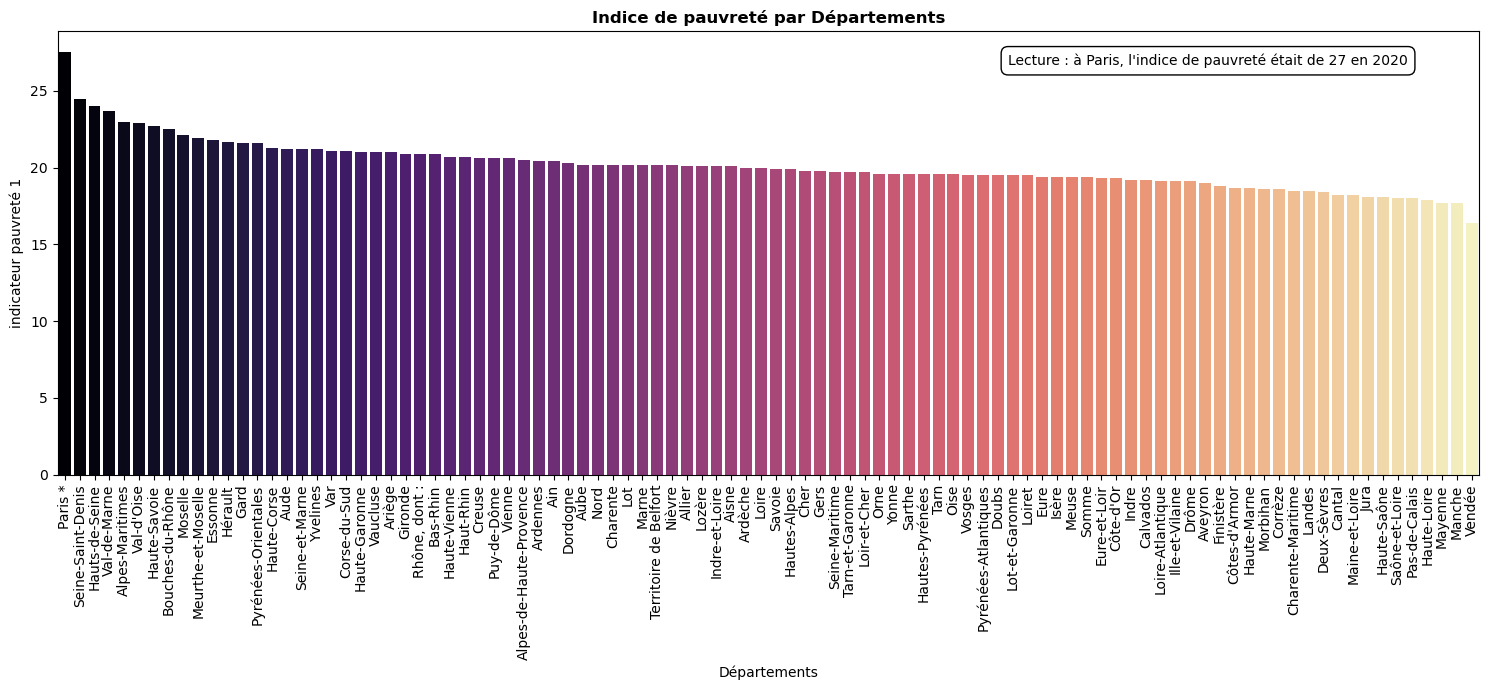

In [18]:
"""On regarde la pauvreté par départements"""
sort_poor = df_visu.sort_values(by="indicateur pauvreté 1", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="indicateur pauvreté 1", data=sort_poor, palette="magma")
plt.xticks(rotation=90)
plt.title("Indice de pauvreté par Départements", fontweight="bold")
plt.xlabel("Départements")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : à Paris, l\'indice de pauvreté était de 27 en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

Malgré l'inclusion du facteur de pauvreté dans l'analyse, les résultats demeurent inchangés, indiquant que la pauvreté n'est pas un indicateur pertinent pour évaluer la surmortalité liée à la Covid-19. Cette constatation suggère que d'autres variables pourraient mieux expliquer les variations observées dans les taux de mortalité.

En dernier lieu, nous examinerons si la population totale constitue un indicateur plus efficace pour expliquer la mortalité liée à la Covid-19.


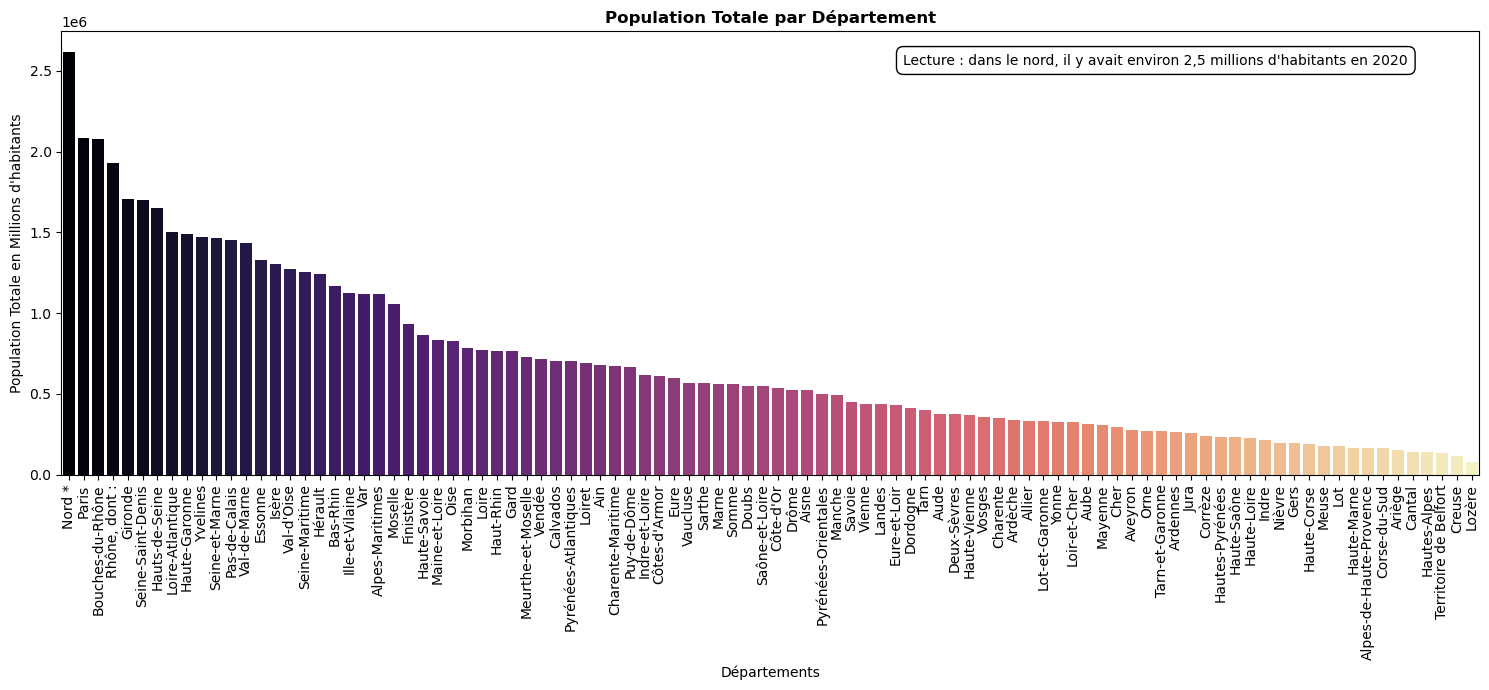

In [19]:
"""On classe maintenant les départements par popultation totale"""
sort_pop = df_visu.sort_values(by="pop_totale", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="pop_totale", data=sort_pop, palette="magma")
plt.xticks(rotation=90)
plt.title("Population Totale par Département", fontweight="bold")
plt.xlabel("Départements")
plt.ylabel("Population Totale en Millions d\'habitants")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : dans le nord, il y avait environ 2,5 millions d\'habitants en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()


plt.show()

Pour conclure, l'analyse de ce dernier diagramme en barres révèle que la population totale a une influence modérée sur la mortalité liée à la Covid-19. Bien qu'une corrélation apparente existe, elle n'est pas suffisante pour expliquer entièrement les variations observées dans les taux de mortalité. Par exemple, le département du Nord et Paris, qui ont enregistré le plus grand nombre de décès en 2020, figurent en tête du classement dans le diagramme. En revanche, des départements moins affectés comme la Dordogne se retrouvent parmi les moins peuplés.

Cette observation peut s'expliquer par plusieurs facteurs :

1. **Densité de Population** : Les départements les moins peuplés tendent à être moins denses, ce qui réduit la probabilité de formation de clusters d'infection. Une moindre densité limite les interactions sociales nécessaires à la propagation rapide du virus, entraînant ainsi un nombre de cas et de décès plus bas.

2. **Accès aux Infrastructures de Santé** : Dans les régions moins peuplées, bien que la densité soit faible, l'accès aux infrastructures de santé peut varier. Cependant, la faible densité semble jouer un rôle plus significatif dans la réduction des clusters de contagion.

3. **Facteurs Socio-Économiques et Comportementaux** : Les différences socio-économiques et les comportements individuels entre les départements peuvent également influencer les taux de mortalité. Par exemple, des politiques de confinement plus strictes ou une meilleure adhésion aux mesures de prévention dans certains départements peuvent contribuer à des taux de mortalité plus faibles, indépendamment de la population totale.

En résumé, bien que la population totale soit un indicateur pertinent pour expliquer partiellement la mortalité liée à la Covid-19, elle ne suffit pas à elle seule pour rendre compte de toutes les variations observées. La densité de population apparaît comme un facteur clé, influençant la formation de clusters et, par conséquent, les taux de mortalité. Pour une compréhension plus complète, il serait nécessaire d'intégrer d'autres variables telles que les infrastructures de santé, les politiques locales de santé publique et les comportements sociaux dans l'analyse.


### Conclusion 

Pour conclure, les résultats issus de cette analyse descriptive suggèrent que certaines caractéristiques, telles que la population totale et le nombre d'établissements de soins dédiés à la Covid-19, pourraient être des facteurs explicatifs de la létalité du virus. Toutefois, ces observations nécessitent une validation rigoureuse à travers des méthodes d'analyse plus avancées.

Il est essentiel de vérifier ces hypothèses par une modélisation statistique appropriée. En effet, une simple visualisation des données ne suffit pas à établir des relations causales ou à confirmer l'importance relative de chaque facteur. Une approche scientifique rigoureuse doit inclure des techniques quantitatives permettant de contrôler les variables confondantes et d'évaluer l'impact individuel de chaque caractéristique observée. Pour ce faire, l'utilisation d'algorithmes de **Machine Learning** s'avère indispensable. 

En résumé, bien que ces statistiques descriptives nous fournissent des indications précieuses sur les tendances observées, elles ne peuvent à elles seules expliquer la létalité de la Covid-19 de manière exhaustive. L'intégration de méthodes de Machine Learning dans l'analyse permettra de confirmer ou d'infirmer les hypothèses formulées, offrant ainsi une base solide pour, par exemple, des recommandations politiques et sanitaires éclairées.

Avant de nous lancer dans cette modélisation statistique, nous avons voulu visualiser les corrélations entre les différentes variables pour essayer d'évaluer les liens qu'elles pouvaient avoir entre elles. 

In [ ]:
#on ne prend pas les valeurs absolues des populations par âge
df_corr = df_visu[["pop_totale",'Moins de 20 ans.1', 'Moins de 25 ans.1', '25 à 64 ans.1', '65 ans ou plus.1',
 '75 ans ou plus.1', '80 ans ou plus.1', '85 ans ou plus.1', 'nb hospitalisations', 'nb deces', 'espérance de vie', 'passage_urg_corona',
 'nb_etab_sante', 'esp_de_vie_H_60', 'esp_de_vie_F_60','esp_de_vie_H_65', 'esp_de_vie_F_65','rapport nv_vie interdécile D9/D1','indicateur pauvreté 1','indicateur pauvreté 2',
 "ratio patients positifs/population",'ratio patients positifs/testés','ratio patients testés/population']]

#on calcule la matrice de corrélation des différentes colonnes
dfCorr = df_corr.corr(method="pearson", numeric_only=True)
#on ne fait apparaître que les coefficients de corrélations ayant une valeur absolue supérieure à 0.5 et on exclut les diagonales
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

NameError: name 'df_visu' is not defined

Cette matrice de corrélation nous permet d'une part de constater qu'il existe d'assez fortes corrélations entre plusieurs variables, ce qui sera à prendre en compte lors de la modélisation. D'autre part, elle nous permet également de quantifier les corrélations entre les variables évoquées lors des statistiques descriptives qui ont été effectuées. 

## Modélisation statistique

On essaye donc d'utiliser des outils de Machine Learning afin d'évaluer l'impact des différentes variables sur le nombre de décès dû au Covid-19 par département. Avant, il faut bien prendre en compte les caractéristiques de notre échantillon, qui pourront expliquer certains résultats surprenants à postériori. On a un dataset de 98 individus (les 98 départements de France métropolitaine) : nos modèles ont donc un fort risque d'over-fitting, d'autant que malgré tout, nous n'avons pas des disparités extrêmes entre nos individus. La méthodologie qui va être employé ici va être d'effectuer d'abord une simple régression linéaire suivant la méthode des moindres carrés ordinaires, puis, selon les résultats obtenus, effectuer éventuellement une régression Ridge, au vu des forts coefficients de corrélation entre nos variables.

### Régression des MCO

La régression linéaire effectuée grâce au package `statsmodels` nous renvoie les valeurs suivantes :

In [20]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               nb deces   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     90.52
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.92e-37
Time:                        22:29:20   Log-Likelihood:                -723.90
No. Observations:                  96   AIC:                             1464.
Df Residuals:                      88   BIC:                             1484.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
espéranc

D'abord, on remarque un $R^2$ très élevé, ce qui, paradoxalement, est plutôt mauvais signe et probablement signe d'un surapprentissage. Comme l'indique la sortie de la régression, les variables ont probablement une forte multicolinéarité. Une régression Ridge ou Lasso peuvent être une bonne idée. On peut en plus envisager des relations non-linéaires mais plutôt polynomiales entre les variables.

### Régression Ridge

On réalise alors une régression Ridge en autorisant les variables d'interactions (de la forme $x \times y$) et les variables quadratiques (donc de la forme $x^2$).
On observe toujours une erreur quadratique moyenne assez élevée et un $R^2$ peu satisfaisant. Néanmoins, il est intéressant de regarder l'importance des différentes variables, ce qui peut nous donner une certaine explicabilité de la relation entre le nombre de décès et les variables.

In [21]:
print(f"Performance du modèle sur le jeu de test :")
print(f" - R² Score : {r2:.4f}")
print(f" - Mean Squared Error (MSE) : {mse:.4f}")
print(f" - Mean Absolute Error (MAE) : {mae:.4f}")

Performance du modèle sur le jeu de test :
 - R² Score : 0.8066
 - Mean Squared Error (MSE) : 486851.1612
 - Mean Absolute Error (MAE) : 509.6051


In [22]:
top_features = coef_df.sort_values(by="Coefficient", key=abs, ascending=False).head(10)  # Top 10
print(top_features)

                                        Feature  Coefficient
1                                    pop_totale   262.917151
5                                 nb_etab_sante   258.651208
6                         ratio population/etab   151.482131
2              rapport nv_vie interdécile D9/D1   115.032416
0                              espérance de vie   -88.614584
32                              nb_etab_sante^2    77.798914
34                      ratio population/etab^2    77.758184
3                         indicateur pauvreté 1    65.695499
28  indicateur pauvreté 1 ratio population/etab    62.778453
11       espérance de vie indicateur pauvreté 2    62.080994


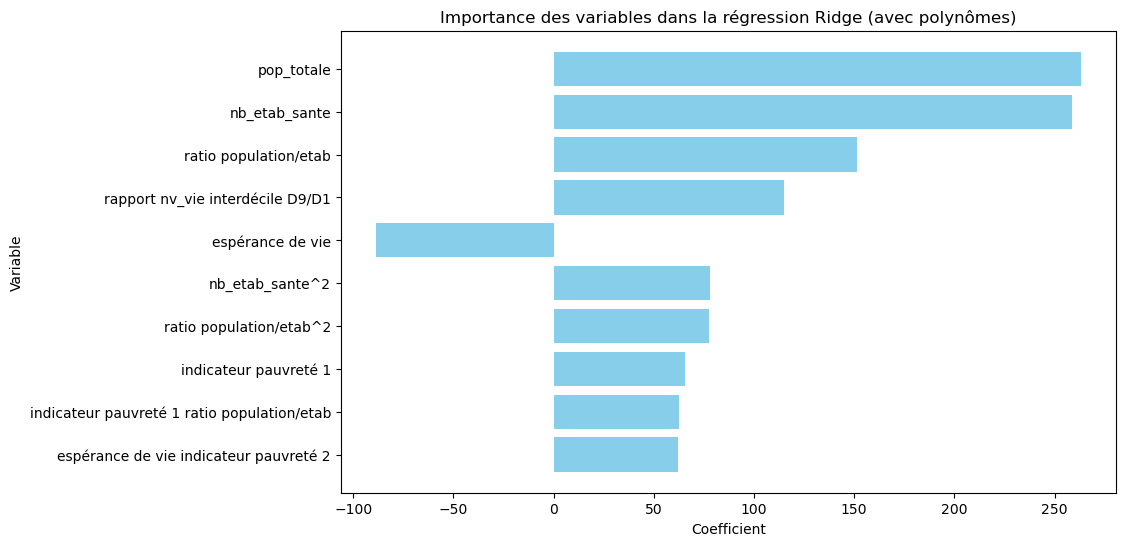

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Coefficient"], color="skyblue")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables dans la régression Ridge (avec polynômes)")
plt.gca().invert_yaxis()
plt.show()

Comme on le remarque, les variables les plus importantes sont la population totale et le nombre d'établissements de santé. En effet, cela s'explique plutôt bien, par le fait qu'un département avec une forte population totale a en générale une plus grande densité de population, et donc plus d'interactions inter-habitants et donc plus d'occasions de se transmettre la maladie. A l'inverse, on pourrait être surpris de la présence du nombre d'établissements de santé comme variable avec un coefficient positif donc ayant un effet croissant sur le nombre de décès. Notre hypothèse est simplement que les décès sont, à priori, des décès recensés au sein des hopitaux ou des cliniques, et donc sont corrélés positivement avec le nombre de décès.
A l'inverse, l'espérance de vie a un coefficient négatif, ce qui prête à indiquer que plus l'espérance de vie dans un département est haut, moins il y a eu de décès du Covid. De nouveau, c'est rassurant, une espérance de vie plus haute étant un indicateur à priori d'une meilleure santé de la population, et donc potentiellement d'une présence diminuée d'individus dits "à risques" (obèses, atteints de maladie chronique, de maladies cardiovasculaires, etc).

## Conclusion générale

Nous avons essayé dans ce projet de mettre en évidence un lien entre les indicateurs sociaux des départements et les effets du Covid. Nous nous sommes en particulier intéressés aux décès liés au Covid. Les statistiques descriptives n'ont pas permis de mettre en évidence un lien entre la surmortalité liée au Covid et la pauvreté. La modélisation à l'aide de la régression Ridge nous dit cependant que l'intensité de la pauvreté (indicateur pauvreté 1 ) est une des variables ayant un grand coefficient dans cette régression, ce qui peut suggérer que la pauvreté participe à l'augmentation du taux de décès. Néanmoins, cette caractéristique est moins importante face au nombre de population et au nombre d'établissements de santé. 

Notre étude ne nous a pas réellement permis de mettre en évidence un effet réel du niveau de vie au sein des départements et de la surmortalité liée au Covid. Une perspective temporelle qui consisterait à voir l'évolution des indicateurs sociaux avec la pandémie nous aurait peut-être permis d'accéder à une approche différente de l'impact du Covid, qui ne soit pas seulement la surmortalité liée à la pandémie.
